Verifying GPU

In [1]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

Verify TPU

In [2]:
import os 
  
if 'COLAB_TPU_ADDR' not in os.environ: 
  print('Not connected to TPU') 
else: 
  print("Connected to TPU") 

Not connected to TPU


Navigating to Fingers Dataset Directory

In [3]:
!ls '/content/drive/My Drive/Colab Notebooks'

 ClothingRecognizerUsingTensorflow.ipynb
 ConvolutionalNN_fashionPredictor.ipynb
 deepCircle_API.ipynb
 deepCircle.ipynb
 fingers.zip
 flooding_311_Houston.csv
 geopandasWorks.ipynb
 gestureRecognitionSoftware.ipynb
 HarrisCountyRoadNetwork.csv
 housePriceRegressionTensorFlow.ipynb
 Houston_311_visu1.ipynb
 PythonVisualizationHarrisCountyroadnetwork.ipynb
 SeparatingSimpleClusterUsingKeras.ipynb
'Waze Roads Mapped.csv'
 Work10.shp


Copying fingers.zip into colab directory and extracting its contents into this directory

In [0]:
zip_path = "/content/drive/My Drive/Colab Notebooks/fingers.zip"


In [0]:
!cp "{zip_path}" .


In [0]:
!unzip -q fingers.zip

In [0]:
!rm fingers.zip

Importing Required Libraries

In [8]:
from IPython.display import Image
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from PIL import Image
#import keras
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras


%matplotlib inline

Using TensorFlow backend.


In [0]:
dir_train = "fingers/train/"
dir_test = "fingers/test/"

In [0]:
files_train = os.listdir(dir_train)
files_test = os.listdir(dir_test)

In [11]:
print("Total files in training directory : " + str(len(files_train)))
print("Total files in testing directory : " + str(len(files_test)))

Total files in training directory : 18000
Total files in testing directory : 3600


In [0]:
X_train = []
Y_train = []

X_test = []
Y_test = []

In [0]:
i = 1

# Preprocess the images in the train directory
for file in files_train:
    path = os.path.join(dir_train, file)
    if "png" in path:
        label = int(path.split("_")[1].split(".")[0][0])
        label = keras.utils.to_categorical(label, num_classes=6, dtype='int32')
        # Convert the image RGB
        img = Image.open(path)
        # Image array
        img = np.array(img)
        img = np.reshape(img, (128, 128, -1)) 

        X_train.append(img)
        Y_train.append(label)

In [0]:
# Preprocess the images in the test directory
for file in files_test:
    path = os.path.join(dir_test, file)
    if "png" in path:
        label = int(path.split("_")[1].split(".")[0][0])
        label = keras.utils.to_categorical(label, num_classes=6, dtype='int32')

        # Convert the image RGB
        img = Image.open(path)
        # Image array
        img = np.array(img)
        img = np.reshape(img, (128, 128, -1)) 

        X_test.append(img)
        Y_test.append(label)

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)     

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [0]:
# Save the numpy arrays
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)

In [17]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(18000, 128, 128, 1)
(18000, 6)
(3600, 128, 128, 1)
(3600, 6)


In [0]:
# Form the training and validation data out of the train folder

X_t, X_v, Y_t, Y_v = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


In [0]:
# Form the simple CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (128, 128, 1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(6, activation = 'softmax'))



In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)      

In [0]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [22]:
history = model.fit(x = X_t, y = Y_t, batch_size = 128, epochs = 10, validation_data = (X_v, Y_v))


Train on 14400 samples, validate on 3600 samples
Epoch 1/10
14400/14400 [==============================] - 11s 784us/step - loss: 4.6440 - accuracy: 0.1751 - val_loss: 1.7921 - val_accuracy: 0.1681
Epoch 2/10
14400/14400 [==============================] - 5s 319us/step - loss: 1.7919 - accuracy: 0.1621 - val_loss: 1.7920 - val_accuracy: 0.1614
Epoch 3/10
14400/14400 [==============================] - 5s 321us/step - loss: 1.7918 - accuracy: 0.1659 - val_loss: 1.7920 - val_accuracy: 0.1614
Epoch 4/10
14400/14400 [==============================] - 5s 320us/step - loss: 1.7918 - accuracy: 0.1674 - val_loss: 1.7919 - val_accuracy: 0.1617
Epoch 5/10
14400/14400 [==============================] - 5s 320us/step - loss: 1.7919 - accuracy: 0.1693 - val_loss: 1.7920 - val_accuracy: 0.1617
Epoch 6/10
14400/14400 [==============================] - 5s 319us/step - loss: 1.7918 - accuracy: 0.1677 - val_loss: 1.7920 - val_accuracy: 0.1617
Epoch 7/10
14400/14400 [==============================] - 5s 3

In [23]:
score = model.evaluate(X_v, Y_v)


3600/3600 [==============================] - 1s 191us/step


In [24]:
print("Loss : ",score[0])
print("Accuracy : {} %".format(score[1]*100))


Loss :  1.7920173438390097
Accuracy : 16.277778148651123 %


In [0]:
#model.save('finger_cnn_model.h5')

In [26]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [0]:

def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()
  
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

In [0]:
#plot_loss(history)
#plot_acc(history)

In [0]:
import datetime
# Load the tensorboard extension
% reload_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/
#r  - recursive, f - ignors non existing files

In [0]:

# Form the simple CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (128, 128, 1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(6, activation = 'softmax'))




In [0]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [0]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
keras_callbacks = [
  tensorboard_callback
]

In [0]:
#train_hist = model.fit(x = X_t, y = Y_t, batch_size = 128, epochs = 10, validation_data = (X_v, Y_v),
                       #callbacks=keras_callbacks)

In [0]:
#it specifies where to look for the training statistics by using
#the magic command for tensorflow board

!kill 2949   # sometime TensorBoard does not show all data. 
# If it shows reusing previous instance use kill command listed

#%tensorboard --logdir logs/fit
%tensorboard --logdir logs/scalars


In [37]:

# We use the Python tempfile library to create files in a generated folder.  
# If you want to used a defined path, replace this code with your own 
# path definitions. 
import tempfile
import os

# get the tempfile location for this Colab session
MODEL_DIR = tempfile.gettempdir()
version = 2   # NOTE: Adjust if you don't want to replace a version of your model
export_path = os.path.join(MODEL_DIR, str(version))  # the final path includes the version
print('Saving model to : {}\n'.format(export_path))

# if path already exists delete everything at the location
if os.path.isdir(export_path):
  print('\nPreviously saved model found, deleting it\n')
  !rm -r {export_path}

# Save the model  
#tf.saved_model.save(model, export_path)
model.save(export_path)
# keras.models.save_model(
#     model,
#     export_path,
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None
# )
# Print save complete message
print('Model saved')

Saving model to : /tmp/2

Model saved


In [0]:
# # predict function to predict the probabilities for each class 0-9
# loaded_model.predict(X_v[0:1])

# # predict_classes to get the class with highest probability 
# loaded_model.predict_classes(X_v[0,1])

Random Number Generated:  2163 Image Label :  [0 0 0 0 0 1]
5
[0 0 0 0 0 1]
5


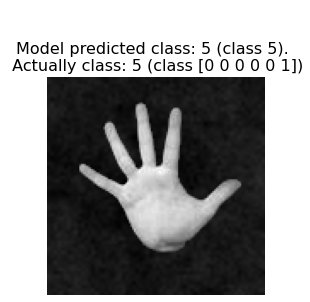

In [61]:
# import skimage and matplotlib and random
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import random

# function to display image
def show(idx, title):
    plt.figure()
    plt.imshow(X_v[idx].reshape(28,28))
    plt.axis('off')
    plt.title('\n\n{}'.format(Y_v[idx]), fontdict={'size': 16})

# generate a random index
r = random.randint(0,len(X_v)-1)

def show_image(index, title, show_colorbar=False):
  plt.figure()
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})
  plt.imshow(X_v[index].reshape(128,128), cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  if (show_colorbar):
    plt.colorbar()
  plt.axis('off')
  plt.show()


print("Random Number Generated: ", r, "Image Label : ", Y_v[r])
predictions=Y_v[r]
# The numpy argmax function returns the index of the highest value.  This is 
# the highest probabilty class predicted by our model. 
predicted_class = np.argmax(predictions)
print(predicted_class)
class_names = ['0', '1', '2', '3', '4','5']
print(Y_v[r])
maxVal = class_names[predicted_class]
print(maxVal)
# Display image, the actual class and the predicted class
show_image(r, 'Model predicted class: {} (class {}). \n Actually class: {} (class {})'.format(
  class_names[predicted_class], predicted_class, maxVal, Y_v[r]))
#show(r, 'Image: {}'.format(X_v[]))
#please output left or right hand when retraining model

In [266]:
print(export_path)
print(MODEL_DIR)

/tmp/2
/tmp


In [250]:
!ls "/tmp/2"

/tmp/2


In [251]:

# add the key
!echo 'deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal' | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
# update the database with the new key
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   151k      0 --:--:-- --:--:-- --:--:--  151k
OK
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hi

In [252]:
!apt-get install tensorflow-model-server


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.1.0).
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [0]:
# Define the environment variable where our saved model resides
os.environ['MODEL_DIR'] = MODEL_DIR
# Define the Python constant and environment variable to point to the port number used to access our model
REST_PORT = '8501'
os.environ['REST_PORT'] = REST_PORT
# Define the Python constant and environment variable to point to the our model name.
#  This is an abitrary name.
MODEL_NAME = 'Gesture Recognition'
os.environ['MODEL_NAME'] = MODEL_NAME

In [254]:
print(MODEL_DIR)
print(REST_PORT)
print(MODEL_NAME)

/tmp
8501
Gesture Recognition


In [255]:
# Run the shell command to launch tensorflow_model_server.  Output status and error
#  messages to the file server.log
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port="${REST_PORT}" \
  --model_name="${MODEL_NAME}" \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 5 in a separate thread.


In [256]:

# Display the tail (last few lines) of the server log which will show any errors
!tail server.log

2020-04-17 23:55:02.004221: E tensorflow_serving/util/retrier.cc:37] Reserving resources for servable: {name: Gesture Recognition version: 2} failed: Failed precondition: /tmp/2; Not a directory


In [0]:
test_images=X_v
def show_image(index, title, show_colorbar=False):
  plt.figure()
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})
  plt.imshow(test_images[index].reshape(28,28), cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  if (show_colorbar):
    plt.colorbar()
  plt.axis('off')
  plt.show()

In [0]:
!pip install -q requests    # Install the requests library which makes HTTP requests to the TensorFlow server 
                            # using our trained our model 
import requests     # import requests

In [0]:
# Select a random image to classify
import random
image_index = random.randint(0,len(test_images)-1)

In [0]:
# Import json library and create the json data structure to be passed in the request.
import json

# The data is assumed to be a list of images, a 4D tensor of the shape [*,28,28,1].  
# Convert the single 3d to 4d
#check_images = np.reshape(test_images[image_index],(-1,28,28,1))
check_images = np.reshape(test_images[image_index],(128,128,-1))
# -1 is variable number of images, 1 is single gray scacle value

# Construct json data passed to server.  "instances" will hold the image(s) we 
#   want the model to classify

#three key value pairs, first two have no values
# instances passes the image pixels
#.dump encodes the data
data = json.dumps({'signature_name': 'serving_default', 'instances': check_images.tolist()})

In [261]:
# Create the request

# HTTP request header
headers = {'content-type': 'application/json'}
#we are an application passing a JSON structure

# Build the url to the service using the constants we defined earlier, should be of the form:
#      http://localhost:8501/v1/models/fashion_mnist:predict
predict_service_url = 'http://localhost:' + REST_PORT + '/v1/models/' + MODEL_NAME + ':predict'

# Make request to the service.  Pass the headers and data.  Wait for the server's reponse.
json_response = requests.post(predict_service_url, data=data, headers=headers)
#use post method to make the call to the tensor flow model server service which is the 
#interface to trained model
#this calls waits for the response

# Parse the response.  For each images we pass we get a list of probabilities 
predictions = json.loads(json_response.text)['predictions']
# predictions[0] is the 10 probabilites for our first and only image.
# predictions[0] has values in the form [0.1, 0.05, ...., 0.6]

# The numpy argmax function returns the index of the highest value.  This is 
# the highest probabilty class predicted by our model. 
predicted_class = np.argmax(predictions[0])

# Display image, the actual class and the predicted class
show_image(image_index, 'Model predicted class: {} (class {}). \n Actually class: {} (class {})'.format(
  class_names[predicted_class], predicted_class, class_names[test_labels[image_index]], test_labels[image_index]))

ConnectionError: ignored